# Project: Wrangling and Analyzing WeRateDogs' Tweets

## Data Gathering


1. Directly download twitter archive dataset (twitter-archive-enhanced.csv)

In [1]:
# import modules and load the data 
import pandas as pd
import numpy as np
import matplotlib as plt


%matplotlib inline

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', sep = ",")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# import requests
import requests

# download image predictions file and save it
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)
open("image_predictions", "wb").write(response.content)

# read image prediction file into Dataframe
image_predictions = pd.read_csv('image_predictions', sep = "\t")

3. Read tweet_json.txt into dataframe

In [3]:
# read this tweet_json.txt file line by line into a pandas DataFrame 
additional_data = pd.read_json("tweet-json.txt", lines=True)

# create a dataframe that contains tweet id, retweet_count & favourite_count columns
rt_fav_count_df = additional_data[['id', 'retweet_count', 'favorite_count']]

## Assessing Data




In [4]:
#display twitter archive table


twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
# display image predictions table

image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [6]:
# display retweet count and favourite count table

rt_fav_count_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [7]:
# view data info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# view data info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
# view data info
rt_fav_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [10]:
# view the summary statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# view summary statistcs
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
#view summary statistics
rt_fav_count_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [13]:
# view some random data sample
twitter_archive.sample(5)
image_predictions.sample(5)
rt_fav_count_df.sample(5)

,id,retweet_count,favorite_count
2248,667832474953625600,68,303
744,780092040432480260,2655,0
903,758099635764359168,11550,21302
2214,668537837512433665,79,265
1270,709225125749587968,647,2615


In [14]:
# check for duplicates across all the data set
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(rt_fav_count_df))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality issues

**twitter archive table**
- some ratings are retweet
- tweet ids are saved as integers rather than string 
- insufficient data in column doggo, floofer, pupper and  puppo
- Many missing values in column in_reply_to_status_id, in_reply_to_user_id<br>



**retweet & favourite count table**
- tweet ids saved as integers rather than string 
- zero favourite count despite many retweets
<br>



**image_predictions table**
- image numbers are saved as integer rather than string
- tweet ids are saved as integers rather than string

**Other Quality issues (in the clean phase)** <br>

- two missing rows in retweet count and favourite count columns
- tetweet count and favourite count columns' data types are float rather than integer
- some ratings do not have images <br>




### Tidiness issues
- The text column in twitter archive table contains more than one variable: tweet texts and url
- Retweet count and favourite count columns in `rt_fav_count_df` and `image_prediction` should be part of `twitter_archive`.





## Cleaning Data


In [15]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
rt_fav_count_df_clean = rt_fav_count_df.copy()

### Missing Data
**Insufficient data in column doggo, floofer, pupper and puppo**



#### Define
- Remove columns doggo, floofer, pupper and puppo in twitter archive table because they contain insufficient data

#### Code

In [16]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

#### Test

In [17]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'],
      dtype='object')

**Many missing values in column in_reply_to_status_id, in_reply_to_user_id**

#### Define
- Remove in_reply_to_status_id, in_reply_to_user_id in twitter archive table because the columns have many missing values

#### Code

In [18]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace = True)

#### Test

In [19]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')


### Tidiness
**The text column in twitter archive table contains more than one variable: tweet texts and url**



### Define
- Extract texts in text column using str.split function

### Code

In [20]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.split('https://', n=1, expand=True)[0]

### Test

In [21]:
# confirm changes
twitter_archive_clean['text'][9]

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate '

**Retweet count and favourite count columns in `rt_fav_count_df` should be part of `twitter_archive`**

### Define

- Merge the `retweet_count` & `favorite_count` columns in `rt_fav_count_clean` to `twitter_archive_clean`, joining on `tweet_id`

### Code

In [22]:
# first rename 'id' column in Retweet and Favourite Count dataframe to 'tweet_id' 
# to make merging possible 


rt_fav_count_df_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [23]:
# confirm changes
rt_fav_count_df_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [24]:
# merge the columns to twitter archive dataframe

twitter_archive_clean = pd.merge(twitter_archive_clean, rt_fav_count_df_clean,
                            on=['tweet_id'], how='left')

### Test

In [25]:
# confirm changes
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328.0,25461.0


**The columns in `image_predictions` should be part of `twitter_archive`**

### Define

- Merge the columns in image_prediction to twitter_archive_clean, joining on tweet_id

### Code

In [26]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean,
                            on=['tweet_id'], how='left')

### Test

In [27]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**Two missing rows in retweet count and favorite count columns**

In [28]:
## view the missing data row

twitter_archive_clean[twitter_archive_clean.retweet_count.isna()]


,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
19,888202515573088257,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,...,2.0,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
815,771004394259247104,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieornah/status/77100213...,12,10,...,1.0,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False


In [29]:
## drop rows with missing retweet count and favorite count

twitter_archive_clean.dropna(subset=['retweet_count'], inplace = True)

In [30]:
# confirm changes
twitter_archive_clean[twitter_archive_clean.favorite_count.isna()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Some ratings do not have images**

**Define**
- Drop rows that have ratings but no image

### Code

In [31]:
# display sample of rows with ratings but no images
twitter_archive_clean[twitter_archive_clean.img_num.isna()].sample(3)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1080,738891149612572673,2016-06-04 00:32:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@mount_alex3 13/10,NaN,NaN,NaN,NaN,13,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,799308762079035393,2016-11-17 17:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I WAS SENT THE ACTUAL DOG IN TH...,7.743144e+17,4.196984e+09,2016-09-09 18:31:54 +0000,https://twitter.com/dog_rates/status/774314403...,14,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,791784077045166082,2016-10-27 23:30:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what this dog is d...,6.820881e+17,4.196984e+09,2015-12-30 06:37:25 +0000,"https://vine.co/v/iqMjlxULzbn,https://vine.co/...",12,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#drop rows with no image
twitter_archive_clean.dropna(subset=['img_num'], inplace = True)

### Test

In [33]:
twitter_archive_clean[twitter_archive_clean.img_num.isna()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality

**Some ratings are retweet**

### Define
- remove rows that have retweets

### Code

In [34]:
# remove rows that are retweet
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

### Test

In [35]:
twitter_archive_clean.retweeted_status_timestamp.isnull().all()

True

In [36]:
# Lets drop these columns as they are no longer needed

twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

In [37]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

**Image numbers are saved as integer (now float in the master DataFrame) rather than string**

### Define
- convert the image number column's data type from float to string using `astype`

In [38]:
## change the image number columns data type from float to string

twitter_archive_clean['img_num'] = twitter_archive_clean['img_num'].astype(str)

### Test

In [39]:

twitter_archive_clean['img_num'].dtype

dtype('O')

**Tweet ids are saved as integer rather than string**

### Define

- Convert the tweet id column's data type from a int to a string using `astype`

### Code

In [40]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

### Test

In [41]:
twitter_archive_clean.tweet_id.dtype

dtype('O')

**Retweet count and favorite count  columns' data types are float rather than integer**

### Define

- Convert the Retweet count and favorite count columns' data types from float to int using `astype`

In [42]:
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype('int64')
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype('int64')

## Test

In [43]:
print(twitter_archive_clean.retweet_count.dtype)
print(twitter_archive_clean.favorite_count.dtype)

int64
int64


**Zero favorite count despite many retweets**

### Define
- fill the rows that has zero favourite count by twice the value of corresponding retweet count 

In [44]:
zero_fav = twitter_archive_clean[twitter_archive_clean['favorite_count'] == 0].index

In [45]:


twitter_archive_clean.loc[zero_fav,'favorite_count'] = (twitter_archive_clean[twitter_archive_clean['favorite_count'] == 0]['retweet_count'])*2

### Test

In [46]:
twitter_archive_clean[twitter_archive_clean['favorite_count'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [47]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', header=True, index=False)

## Analyzing and Visualizing Data


In [48]:
# load the saved master dataset 

master_data = pd.read_csv('twitter_archive_master.csv')

# display the first five row

master_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [49]:
# convert img_num to string

master_data.img_num = master_data.img_num.astype('int64')
master_data.img_num.dtype

dtype('int64')

In [50]:
# view the proportion of image number  

img_num_prop = master_data.img_num.value_counts()/master_data.img_num.value_counts().sum()
img_num_prop

1    0.858074
2    0.095787
3    0.031093
4    0.015045
Name: img_num, dtype: float64

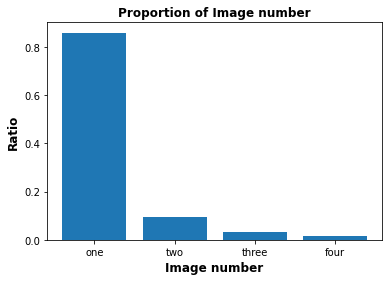

In [51]:

#plot bar chart

location = [1,2,3,4] 
labels = ['one', 'two', 'three','four']

plt.pyplot.bar(location,img_num_prop, tick_label = labels)


# add a title
plt.pyplot.title('Proportion of Image number', fontsize = 12, weight = 'bold')

#add labels
plt.pyplot.xlabel('Image number', fontsize = 12, weight = 'bold')
plt.pyplot.ylabel('Ratio', fontsize = 12, weight = 'bold');

85.8% of the dog ratings tweets has one image, about 10% has two images, 3.1% of the tweets contains 3 images and about 1.5% has four images. 

In [52]:
# view the average retweet count group by the number of images 

img_rt_prop = master_data.groupby('img_num').mean()['retweet_count']
img_rt_prop

img_num
1    2560.370544
2    3876.172775
3    3984.467742
4    4957.533333
Name: retweet_count, dtype: float64

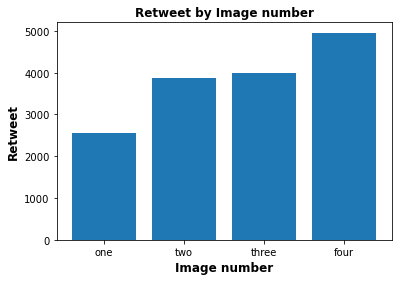

In [53]:
#plot bar chart

location = [1,2,3,4] 
labels = ['one', 'two', 'three','four']

plt.pyplot.bar(location,img_rt_prop, tick_label = labels)

# add a title
plt.pyplot.title('Retweet by Image number', fontsize = 12, weight = 'bold')

#add labels
plt.pyplot.xlabel('Image number', fontsize = 12, weight = 'bold')
plt.pyplot.ylabel('Retweet', fontsize = 12, weight = 'bold');

Tweets that contain four images have the highest average retweet count.

In [54]:
# view the average favourite count group by the number of images 

img_fav_prop = master_data.groupby('img_num').mean()['favorite_count']
img_fav_prop

img_num
1     8190.212741
2    12913.554974
3    12376.935484
4    16358.800000
Name: favorite_count, dtype: float64

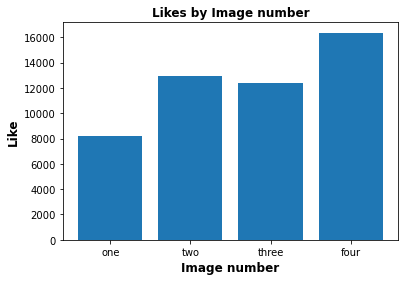

In [55]:
#plot bar chart

location = [1,2,3,4] 
labels = ['one', 'two', 'three','four']

plt.pyplot.bar(location,img_fav_prop, tick_label = labels)

# add a title
plt.pyplot.title('Likes by Image number', fontsize = 12, weight = 'bold')

#add labels
plt.pyplot.xlabel('Image number', fontsize = 12, weight = 'bold')
plt.pyplot.ylabel('Like', fontsize = 12, weight = 'bold');

Tweets that contain four images also have the highest favorite count, followed by tweets that contain two images.

In [56]:
# view the top 5 most featured dog breeds 
# using the #1 prediction i.e p1
master_data.p1.value_counts()[:5]

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
Name: p1, dtype: int64

In [57]:
# view their combined total as a proportion of the whole featured dogs .
master_data.p1.value_counts()[:5].sum()/master_data.p1.value_counts().sum()

0.22818455366098295

Golden retriever, Labrador retriever, Pembroke, Chihuahua and pug are the most featured dogs in WeRateDog's tweets. Their combined proportion is approxiamtely 23% of the total featured dogs. 

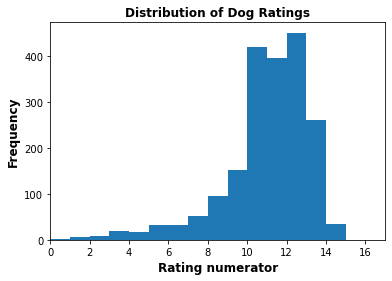

In [58]:
# display the distribution of dog ratings using rating numerator only. Since the denominator is usually 10

bin = np.arange(0,master_data.rating_numerator.max(),1)
plt.pyplot.hist(data = master_data, x = 'rating_numerator', bins = bin)

# add a title
plt.pyplot.title('Distribution of Dog Ratings', fontsize = 12, weight = 'bold')

#add labels
plt.pyplot.xlabel('Rating numerator', fontsize = 12, weight = 'bold')
plt.pyplot.ylabel('Frequency', fontsize = 12, weight = 'bold')

# set x-axis limit to 17 to zoom in on ratings that occur frequently
plt.pyplot.xlim((0,17));

A typical dog rating on WeRateDog lies between 10/10 and 13/10

### Insights

- 85.8% of the dog ratings tweets has one image, about 10% has two images, 3.1% of the tweets contains 3 images and 1.5% has four images.
- Tweets that contain four images have the highest average retweet count.
- Tweets that contain four images also have the highest favourite count, followed by tweets that contain two images.
- Golden retriever, Labrador retriever, Pembroke, Chihuahua and pug are the most featured dogs in WeRateDogs tweets. Their combined proportion is approximately 23% of the total featured dogs.
- A typical dog rating on WeRateDog lies between 10/10 and 13/10
